<a href="https://colab.research.google.com/github/GustavoHDLC1/Colab_Files_PADP/blob/main/PracticaRegresionLinealMultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Enlace GitHub](https://)

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Práctica: Regresión Lineal Múltiple
---


## Datos del Estudiante

*   Apellidos y Nombre: Hernández De la Cruz Gustavo
*   Matrícula: 261551

---



##  Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar regresión lineal múltiple utilizando Scikit-Learn para modelar la relación entre varias variables independientes y una variable dependiente**, verificar los supuestos del modelo, interpretar los coeficientes, analizar la correlación entre predictores y evaluar el rendimiento del modelo utilizando métricas como el MSE, RMSE y R².

Datos
Trabajarás con el archivo `advertising.csv`, que contiene información sobre el gasto publicitario en diferentes medios y las ventas obtenidas:

-`TV`: inversión en publicidad televisiva.

-`Radio`: inversión en publicidad en radio.

-`Newspaper`: inversión en publicidad en periódicos.

`Sales`: ventas del producto (variable dependiente).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `advertising.csv`.
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente las variables.

In [17]:
# Tu código aquí
# Escribe tu código aquí
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [4]:
ruta = '/content/drive/MyDrive/MIAAD/PADP/advertising.csv'
df = pd.read_csv(ruta)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


En general se observa que se hace una mayor inversión en TV, lo cual hace sentido ya que de los 3 canales, es el de mayor alcance, seguido de periódico y por último radio, en las 3 variables dependientes la desviación estándar es alta, por lo que es un indicio de gran dispersión en los datos.

## Parte 2: Análisis exploratorio de los datos
### 2.1  Análisis de la Relación Lineal entre la variable dependiente y las independientes
1. Grafica dispersión entre cada variable independiente (`TV`, `Radio`, `Newspaper`) y `Sales`. Usa también regplot.
2. Interpreta visualmente la relación entre variables.

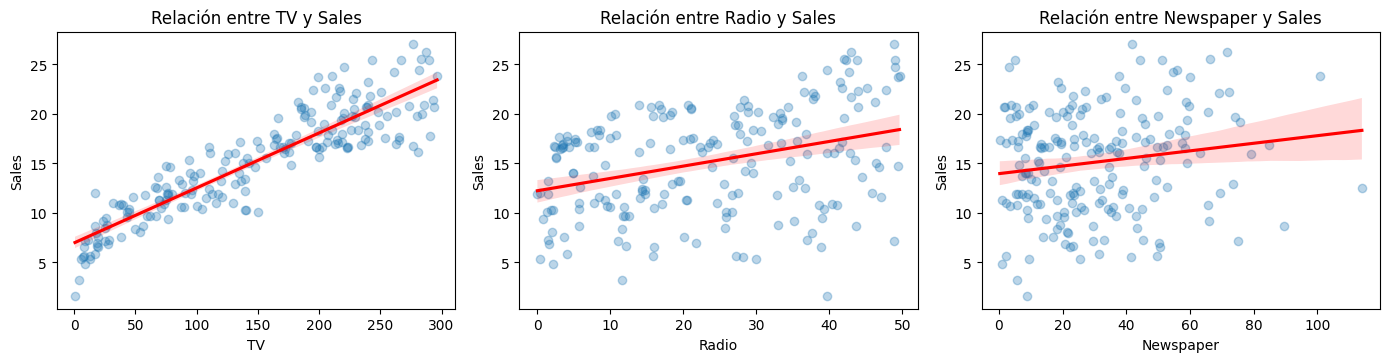

In [14]:
# Gráficos de dispersión
columnas = ['TV', 'Radio', 'Newspaper']
y = df['Sales']
plt.figure(figsize=(14, 10))
for i, col in enumerate(columnas):
    plt.subplot(3, 3, i + 1)
    sns.regplot(x=df[col], y=y, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'}) # Se agrega regplot
    plt.title(f"Relación entre {col} y Sales")

plt.tight_layout()
plt.show()

En el caso de TV y Sales la relación es muy clara visualmente, se observa que son linealmente dependientes, sin embargo, en el caso de radio, los datos están dispersos y no es posible determinar que exista correlación, por último, para periódico los datos están mucho más dispersos.

### 2.2: Correlación entre variables
1. Calcula la matriz de correlación.
2. Visualízala con un heatmap.
3. Responde: ¿Qué variables están más correlacionadas con `Sales`? ¿Hay correlación alta entre predictores?

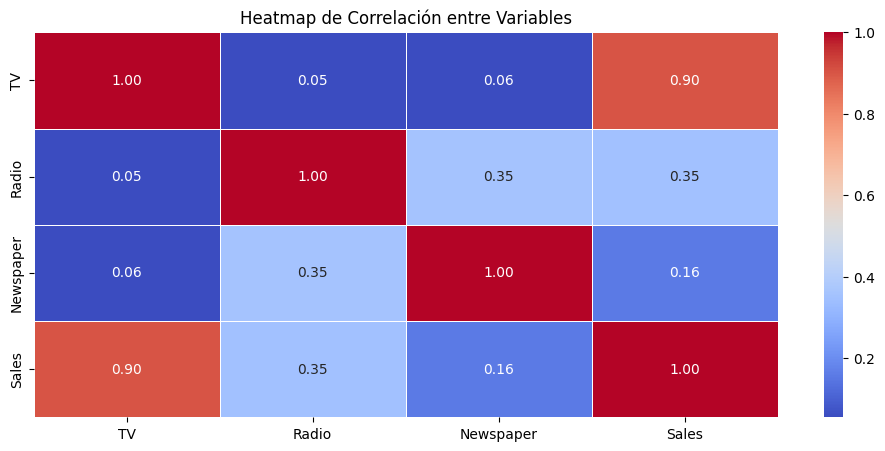

In [15]:
# Correlación y heatmap
plt.figure(figsize=(12, 5))
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title("Heatmap de Correlación entre Variables")
plt.show()

Con esto se confirma la fuerte correlación que se veía anteriormente entre TV y Sales, sin embargo, destaca que la correlación entre radio y Sales no es tan pequeña como se creía, pues es de 0.35, lo que indica cierto grado de relación, aun que no muy grande, por último, con periódico, es poco significativa. Adicionalmente, entre las variables predictoras, se observa una relación significativa entre radio y periódico, lo que podría generar ciertos problemas en el modelo

## Parte 3. Multicolinealidad
1. Calcula el VIF (Variance Inflation Factor) para cada predictor.
2. Crea un diagrama de barras  para mostrar el  VIF
3. Interpreta si hay multicolinealidad:
- ¿Alguna variable tiene un VIF mayor a 5 o mayor a 10?
- ¿Qué implicaciones tiene esto para el modelo?


### Análisis de Multicolinealidad ###
    Variable       VIF
0      const  6.848900
1         TV  1.004611
2      Radio  1.144952
3  Newspaper  1.145187


/tmp/ipython-input-4090346940.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VIF', y='Variable', data=vif_data, palette='coolwarm')


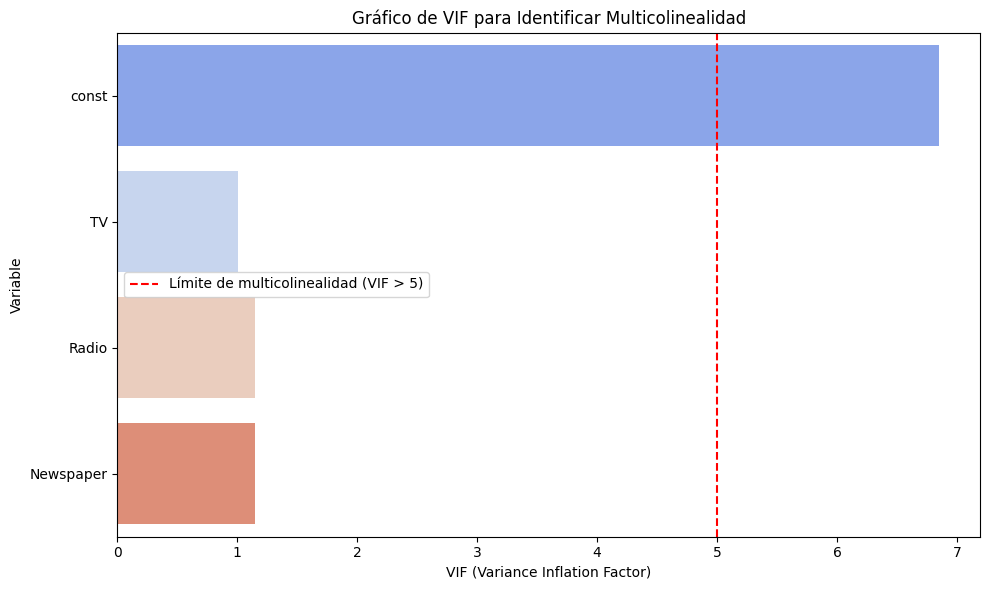

In [18]:
#Multicolinealidad
# El VIF evalúa la colinealidad de cada variable con respecto a las demás. VIF > 5 o 10 indica posible multicolinealidad.
# Agregar constante para calcular el VIF
X = add_constant(df.drop(columns=['Sales']))  # Matriz de características sin la variable dependiente
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\n### Análisis de Multicolinealidad ###")
print(vif_data)

# 7. Visualización de VIF
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Variable', data=vif_data, palette='coolwarm')
plt.axvline(x=5, color='red', linestyle='--', label='Límite de multicolinealidad (VIF > 5)')
plt.xlabel('VIF (Variance Inflation Factor)')
plt.title('Gráfico de VIF para Identificar Multicolinealidad')
plt.legend()
plt.tight_layout()
plt.show()

const     -> 6.84 \
TV        -> 1.00 \
Radio     -> 1.14 \
Newspaper -> 1.14 \
Para las 3 variables predictoras el valor es muy cercano a 1, lo cual es el caso ideal ya que indica que no existe colinealidad, sin embargo, para el VIF de la constante, el valor es ligeramente mayor a 5, lo que indica una alta colinealidad y podría generar problemas en el modelo, ya que sería difícil determinar el efecto de cada predictor de manera aislada

## Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación

### 4.1 Entrenamiento del Modelo (Todas las Variables Independientes)

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes  en términos de ventas?

In [23]:
#ntrenamiento del Modelo (Todas las Variables Independientes)
X = df.drop(columns=['Sales'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LinearRegression()
model.fit(X_scaled,y)

LinearRegression()

In [24]:
coefficients = model.coef_
intercept = model.intercept_

print(f"\nCoeficientes estimados: {coefficients}")
print(f"Término independiente estimado: {intercept}")
#######################################################
equation = f"Sales = {intercept} "
for i, coef in enumerate(coefficients):
  equation += f"+ ({coef} * {X.columns[i]}) "

equation #se obtiene el modelo con los coeficientes


Coeficientes estimados: [4.66270025 1.58465027 0.00729187]
Término independiente estimado: 15.130500000000001


'Sales = 15.130500000000001 + (4.662700245086694 * TV) + (1.5846502733236385 * Radio) + (0.0072918683037688226 * Newspaper) '

Para el término independiente se obtuvo un valor de 15.13, lo cual indica que de manera independiente al resto de variables, esas son ventas constantes, por otra parte vemos que el coeficiente para TV es de 4.66 y es el más alto de las variables, lo que indica que es la más significativa para el modelo, por otro lado el coeficienta para el radio es de 1.58, y finalmente para periódico es de 0.007, lo que indica que su efecto es casi nulo y no aporta mucho valor.

### 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?

In [25]:
#Normalidad de los residuos
y_pred = model.predict(X_scaled)
y_real = y
df_pred = pd.DataFrame({'Real': y_real, 'Predicción': y_pred})

In [26]:
# Normalidad de los residuos
df_pred['residuos'] = df_pred['Real'] - df_pred['Predicción']

In [27]:
# Función para realizar pruebas de normalidad
def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")

    # Prueba de Shapiro-Wilk
    shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))
    print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

    # Prueba de Kolmogorov-Smirnov
    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")

    # Prueba de Anderson-Darling
    anderson_test = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < cv:
            print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
        else:
            print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")

    # Prueba de D'Agostino-Pearson
    dagostino_test = stats.normaltest(data)
    print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")

# Función para graficar histograma y QQ-Plot
def plot_distribution(data, column_name):
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=50, kde=True, color="blue")
    plt.title(f"Distribución de {column_name}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.show()

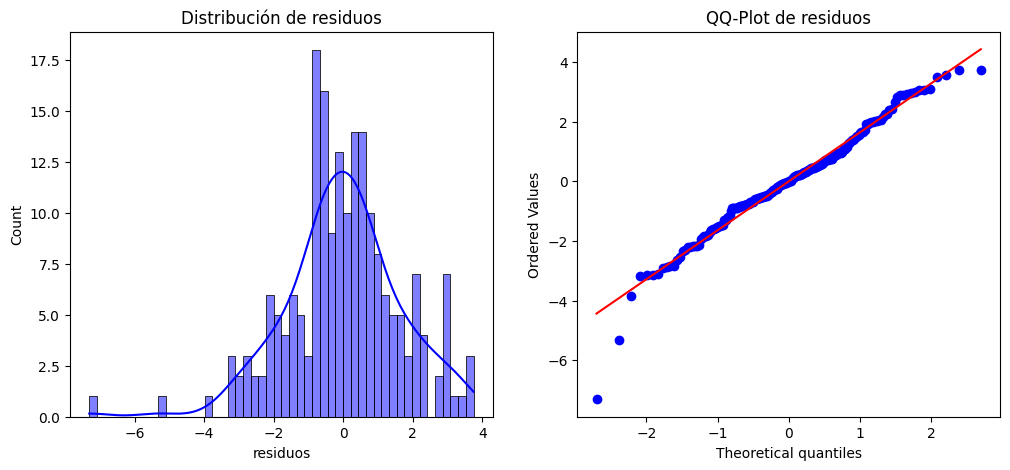


Pruebas de normalidad para la columna: residuos
Shapiro-Wilk Test: p-valor = 0.00158
Kolmogorov-Smirnov Test: p-valor = 0.12577
Anderson-Darling Test: Estadístico = 0.84765
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos parecen normales.
  Al nivel de significancia 1.0%, los datos parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00032


In [28]:
plot_distribution(df_pred['residuos'], 'residuos')
normality_tests(df_pred['residuos'], 'residuos')

De acuerdo con el histograma, la forma no parece distribuirse como una normal, sin embargo, de acuerdo con el KS Test, parece que si se distribuyen como una normal, lo que se aprecia en el QQPlot donde los datos se ajustan a la recta

### 4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?

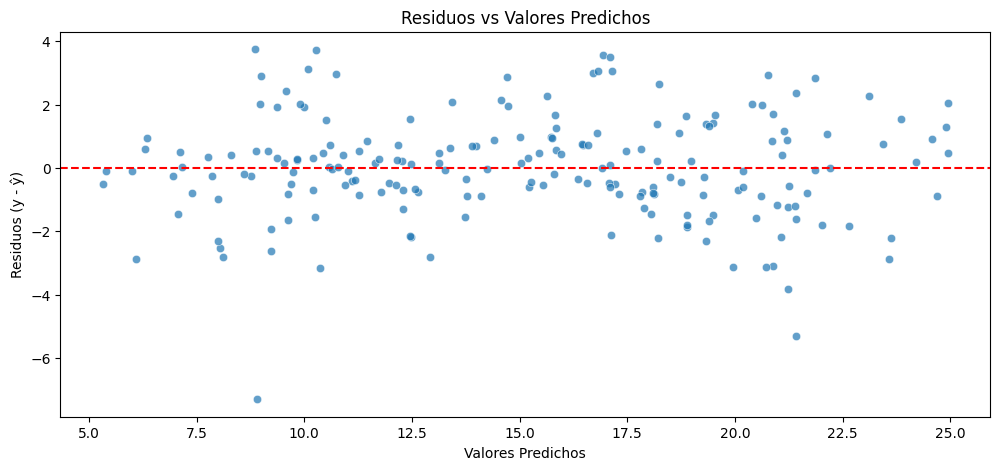

In [29]:
# Homocedasticidad
# Gráfico de residuos vs predichos
plt.figure(figsize=(12, 5))
sns.scatterplot(x='Predicción', y='residuos', data=df_pred, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos (y - ŷ)')
plt.show()

Los residuos se distribuyen aleatoriamente al rededor de 0, lo que indica un buen ajuste

### 4.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal, b) Desviaciones sistemáticas indican asimetría o colas pesadas.

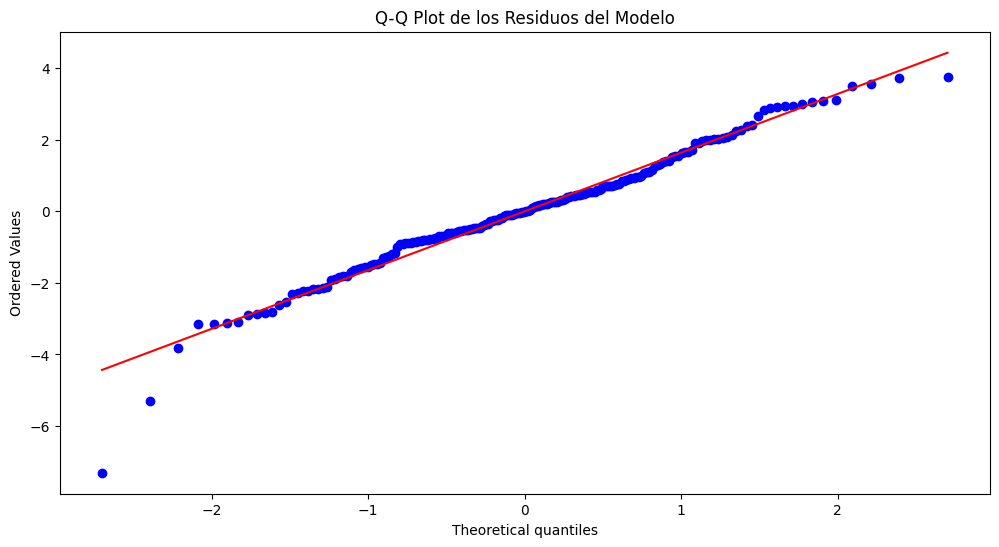

In [30]:
# Q-Q Plot
plt.figure(figsize=(12, 6))
stats.probplot(df_pred['residuos'], dist="norm", plot=plt)

# Añadir título
plt.title("Q-Q Plot de los Residuos del Modelo")

# Mostrar la gráfica
plt.show()

A excepción de algunos puntos en los extremos, el resto se ajusta muy bien a la recta, lo que indica una posible distribución normal en los residuos

### 4.5. Evaluación del Modelo

1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?


In [32]:
#Evaluación del Modelo
# Evaluación del modelo
mse = mean_squared_error(y, y_pred)  # Error cuadrático medio
rmse = np.sqrt(mse)  # Raíz del error cuadrático medio
r2 = r2_score(y, y_pred)  # Coeficiente de determinación R^2
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

Error Cuadrático Medio (MSE): 2.7060
Raíz del Error Cuadrático Medio (RMSE): 1.6450
Coeficiente de Determinación (R²): 0.9026


En este caso el MSE es pequeño, lo que implica que el RMSE también lo es, esto significa que el error medio es pequeño, es decir, no hay una variación significativa entre el valor predicho y el valor real, por otra parte, el valor de $R^2$  es de 0.90, muy cercano a uno, lo que implica que el modelo describe el 90% de la variabilidad, el cual es muy bueno, sin embargo, se necesitaría un conjunto de prueba para verificar que no se trata de un sobreajuste, ya que en general las métricas son demasiado buenas.

### 4.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
3.¿Qué observas?¿Qué observas? ¿Qué información puedes obtener de esta gráfica?

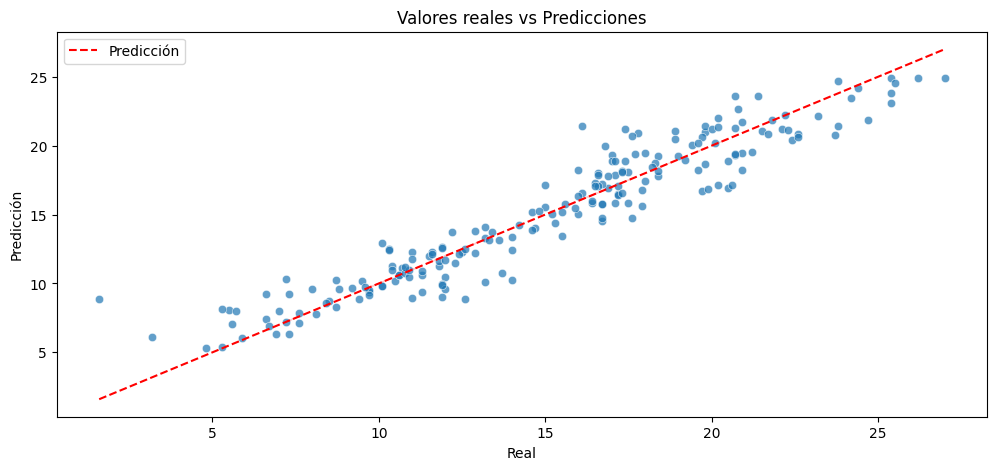

In [36]:
#Visualización de las Predicciones
# Gráfico
plt.figure(figsize=(12, 5))
sns.scatterplot(x='Real', y='Predicción', data=df_pred, alpha=0.7)
sns.lineplot(x='Real', y='Real', data=df_pred, color='red', linestyle='--', label='Predicción')
plt.title('Valores reales vs Predicciones')
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.legend()
plt.show()

Se observa que la recta se ajusta muy bien a las observaciones, lo que indica que tiene un buen rendimiento con el conjunto de entrenamiento.

### 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.

 - ¿Qué variables tienen p-value menores a 0.05?

 - ¿Cuál es la conclusión sobre esas variables?


In [37]:
#P-values
import statsmodels.api as sm
# Variables dependiente e independiente
X = df.drop(columns=['Sales'])
y = df['Sales']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled = sm.add_constant(X_scaled)
# Ajustar modelo OLS (Ordinary Least Squares)
model_sm = sm.OLS(y, X_scaled).fit()

# Resumen de resultados
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           8.13e-99
Time:                        02:07:08   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1305      0.117    128.771      0.0

Los coeficientes obtenidos son los mismos, en este caso se observa que solo el valor de Newspaper está por encima de 0.05, lo que indica que no influye en el modelo, eso explica porque su coeficiente es tan bajo

##Parte 5:  Construcción del Modelo (sin Multicolinealidad), Evaluación

En el caso de que hayas detectado variables con multicolinealidad. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

Ninguna de las variables predictoras mostró multicolinealidad, en los 3 casos el VIF era muy cercano a 1

## Parte 6: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación

En el caso de que hayas detectado variables sin una relación lineal con la variable dependiente. Elimina aquellas que presenten esta característica y realiza lo siguiente.

En el caso de que hayas detectado variables sin una relación lineal. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

In [40]:
# el coeficiente de newspaper con sales es de 0.16, por lo que se probará ajustar el modelo sin esa variable
# Variables dependiente e independiente
X = df.drop(columns=['Sales','Newspaper'])
y = df['Sales']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LinearRegression()
model.fit(X_scaled,y)

LinearRegression()

In [41]:
coefficients = model.coef_
intercept = model.intercept_

print(f"\nCoeficientes estimados: {coefficients}")
print(f"Término independiente estimado: {intercept}")
#######################################################
equation = f"Sales = {intercept} "
for i, coef in enumerate(coefficients):
  equation += f"+ ({coef} * {X.columns[i]}) "

equation #se obtiene el modelo con los coeficientes


Coeficientes estimados: [4.66297261 1.58721742]
Término independiente estimado: 15.130500000000001


'Sales = 15.130500000000001 + (4.662972611875511 * TV) + (1.5872174231801197 * Radio) '

In [42]:
#Normalidad de los residuos
y_pred = model.predict(X_scaled)
y_real = y
df_pred = pd.DataFrame({'Real': y_real, 'Predicción': y_pred})

In [43]:
# Normalidad de los residuos
df_pred['residuos'] = df_pred['Real'] - df_pred['Predicción']

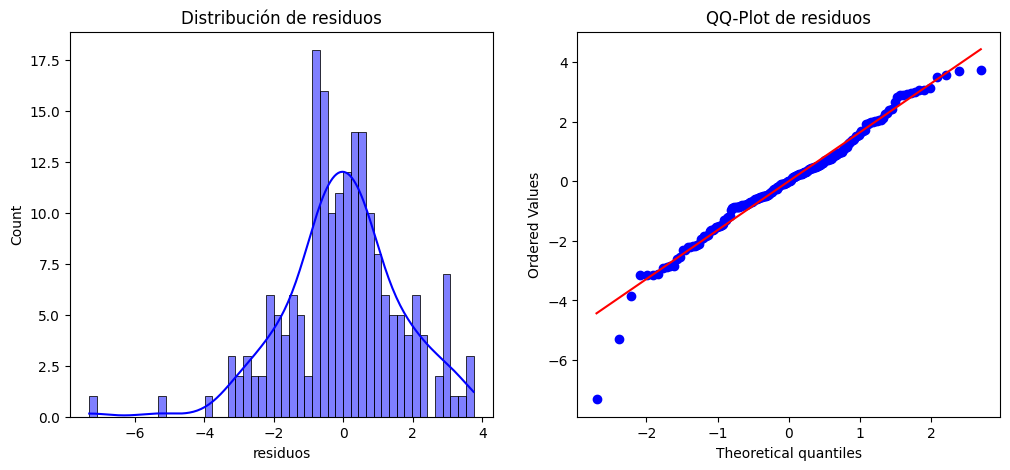


Pruebas de normalidad para la columna: residuos
Shapiro-Wilk Test: p-valor = 0.00154
Kolmogorov-Smirnov Test: p-valor = 0.13127
Anderson-Darling Test: Estadístico = 0.84752
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos parecen normales.
  Al nivel de significancia 1.0%, los datos parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00030


In [44]:
plot_distribution(df_pred['residuos'], 'residuos')
normality_tests(df_pred['residuos'], 'residuos')

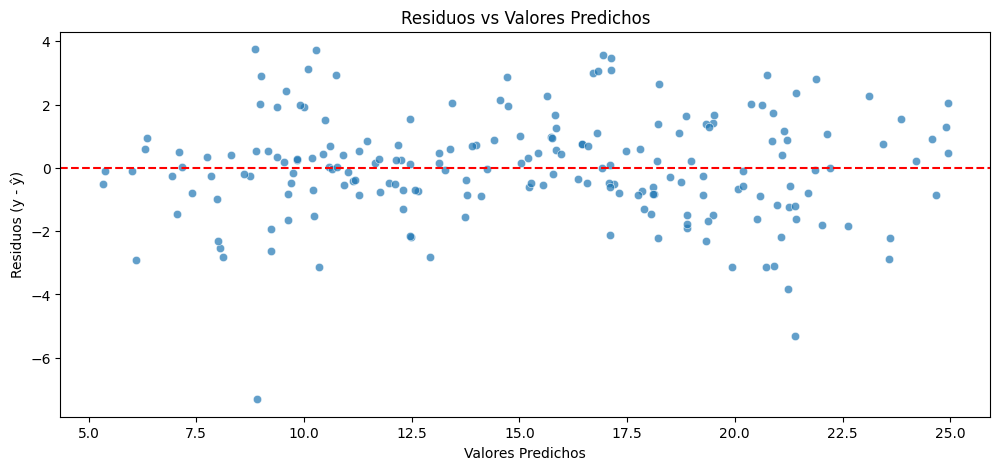

In [45]:
# Homocedasticidad
# Gráfico de residuos vs predichos
plt.figure(figsize=(12, 5))
sns.scatterplot(x='Predicción', y='residuos', data=df_pred, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuos vs Valores Predichos')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos (y - ŷ)')
plt.show()

In [46]:
# Evaluación del modelo
mse = mean_squared_error(y, y_pred)  # Error cuadrático medio
rmse = np.sqrt(mse)  # Raíz del error cuadrático medio
r2 = r2_score(y, y_pred)  # Coeficiente de determinación R^2
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

Error Cuadrático Medio (MSE): 2.7061
Raíz del Error Cuadrático Medio (RMSE): 1.6450
Coeficiente de Determinación (R²): 0.9026


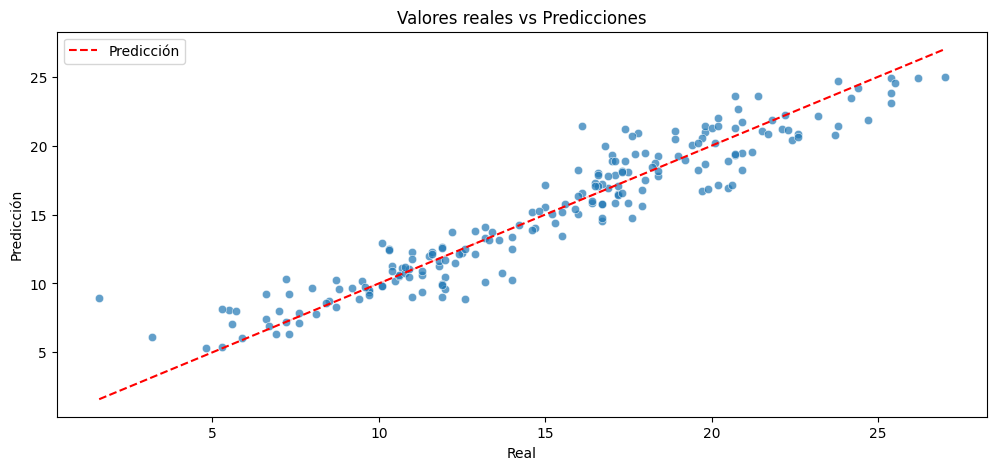

In [47]:
#Visualización de las Predicciones
# Gráfico
plt.figure(figsize=(12, 5))
sns.scatterplot(x='Real', y='Predicción', data=df_pred, alpha=0.7)
sns.lineplot(x='Real', y='Real', data=df_pred, color='red', linestyle='--', label='Predicción')
plt.title('Valores reales vs Predicciones')
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.legend()
plt.show()

##7. Conclusiones.

¿Cuál de los tres modelos construidos fue el mejor?
¿Cuál fue el atributo que mas influencia tiene en las ventas?

Los resultados fueron prácticamente los mismos, de hecho las métricas de rendimiento no cambiaron, en el último modelo solo se eliminó la variable de Newspaper ya que su coeficiente era muy bajo y el P-value indicaba que no tenía un efecto en la predicción, estadisticamente, es por ello que se puede considerar el mejor modelo, ya que obtuvo los mismo resultados con una varible menos, por lo que para efectos del negocio, implica considerar menos aspectos, además este análisis y modelo permitió observar que la variable con mayor influencia es la TV, por lo que se podrían centrar en el efecto de esa variable ya que es la aumenta en mayor medida las ventas.